In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [30]:
from scipy.optimize import curve_fit

In [3]:
figsize(10, 8)

In [4]:
def naive_map(data,ra,dec,ra_num_bins=60,dec_num_bins=50):
    ra_bins = np.linspace(ra.min(),ra.max(),ra_num_bins)
    dec_bins = np.linspace(dec.min(),dec.max(),dec_num_bins)
    p,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins),weights=data)
    hits,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins))
    return p, hits, ra_bins, dec_bins

In [74]:
def get_map(bank='A', session='5'):
    dataf = np.load('/home/mabitbol/GBT-S140/datamaps/datamapsyy_'+bank+'_'+session+'.npz')
    tmask = dataf['tmask']
    ras = dataf['ras'][tmask]
    decs = dataf['decs'][tmask]
    calibrated = dataf['meansub'][tmask]
    
    nrabins = ( ras.max() - ras.min() ) / (1. / 60.)
    ndecbins = ( decs.max() - decs.min() ) / (1. / 60.)
    
    datamap, hits, rabins, decbins = naive_map(calibrated, ras, decs, nrabins, ndecbins)
    mask = hits == 0
    signal = datamap / hits
    signal[mask] = np.nan
    
    figure()
    pc = pcolormesh(rabins, decbins, signal.T)
    clim(-0.1, 0.1)
    cb = colorbar()
    xlabel('RA [degrees]')
    ylabel('DEC [degrees]')
    cb.set_label('Flux [Jy]')
    return signal.T, hits.T, rabins, decbins

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  app.launch_new_instance()
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in divide


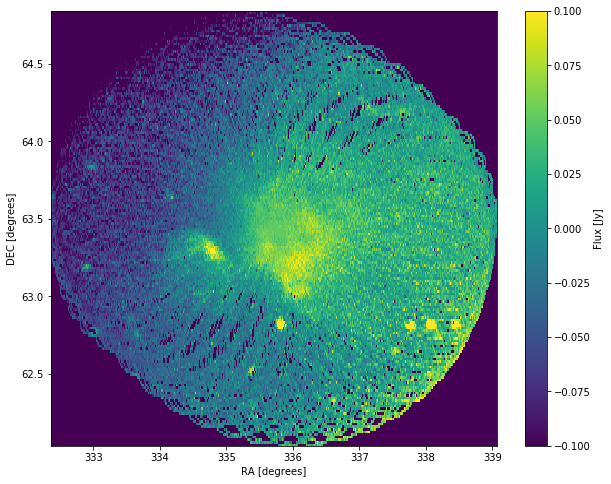

In [88]:
signalA, hitsA, rabins, decbins = get_map('A', '5')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  app.launch_new_instance()
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in divide


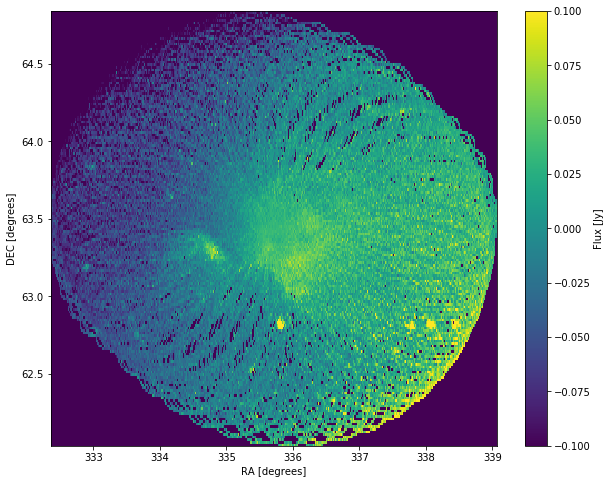

In [76]:
signalB, hitsB, rabins, decbins = get_map('B', '5')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  app.launch_new_instance()
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in divide


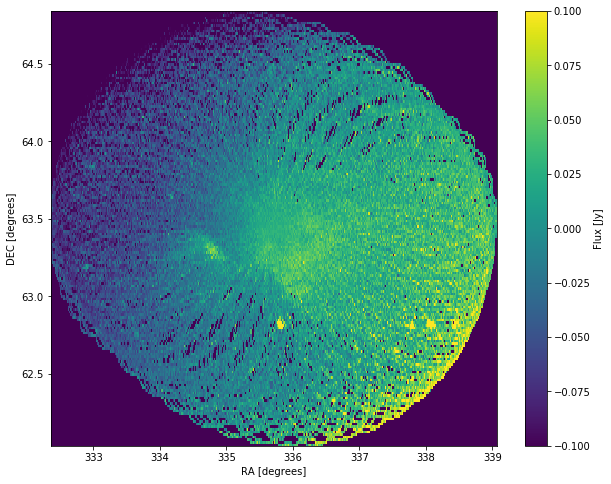

In [77]:
signalC, hitsC, rabins, decbins = get_map('C', '5')

In [22]:
N = size(signalA)

In [28]:
sigA = signalA.reshape(N, -1)
sigB = signalB.reshape(N, -1)
sigC = signalC.reshape(N, -1)

In [29]:
def line(x, m, b):
    return m * x + b

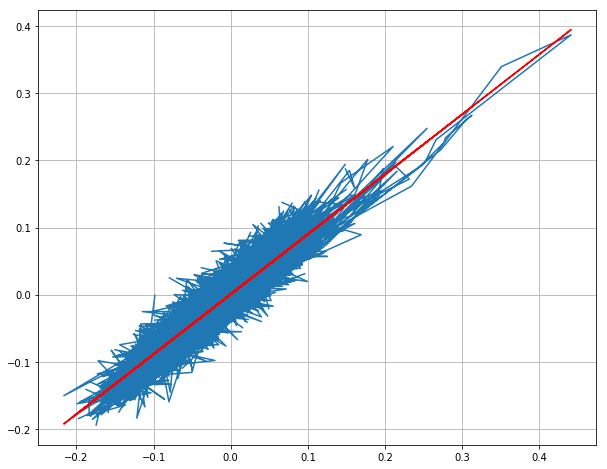

In [56]:
plot(sigA, sigB)
#plot(sigA, line(sigA, 1., 0), 'g')
plot(sigA, line(sigA, *popt[0]), 'r')
grid()

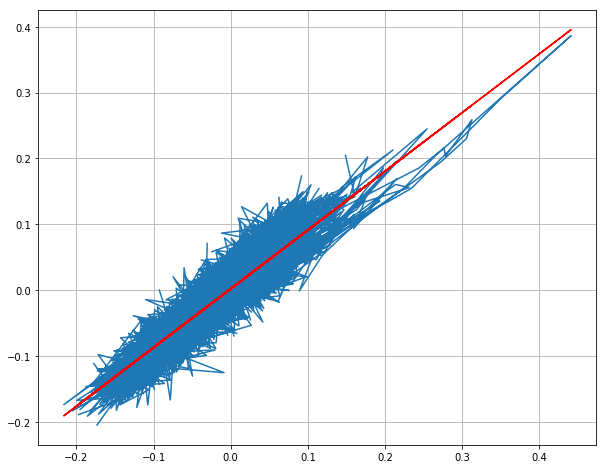

In [61]:
plot(sigA, sigC)
#plot(sigA, line(sigA, 1., 0), 'g')
plot(sigA, line(sigA, *popt[0]), 'r')
grid()

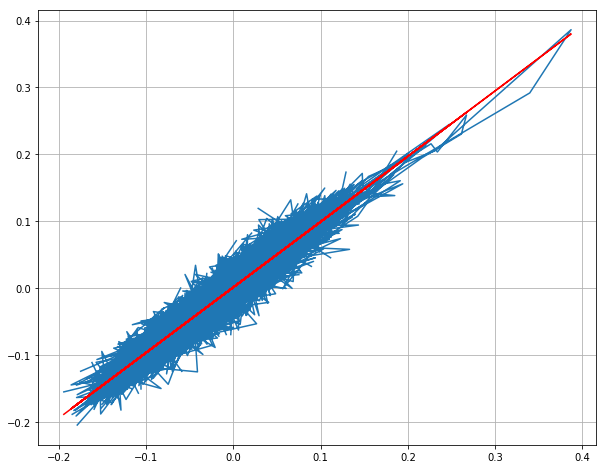

In [68]:
plot(sigB, sigC)
#plot(sigB, line(sigB, 1., 0), 'g')
plot(sigB, line(sigB, *popt[0]), 'r')
grid()

In [51]:
maskA = ~np.isnan(sigA)
maskB = ~np.isnan(sigB)
mask = maskA * maskB
mask *= np.abs(sigA) < 0.2

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less


In [52]:
popt = curve_fit(line, sigA[mask], sigB[mask])

In [53]:
popt[0]

array([  8.93381219e-01,   5.73080332e-04])

In [58]:
maskA = ~np.isnan(sigA)
maskC = ~np.isnan(sigC)
mask = maskA * maskC
mask *= np.abs(sigA) < 0.2

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less


In [59]:
popt = curve_fit(line, sigA[mask], sigC[mask])

In [60]:
popt[0]

array([ 0.89219866,  0.0019845 ])

In [64]:
maskB = ~np.isnan(sigB)
maskC = ~np.isnan(sigC)
mask = maskB * maskC
mask *= np.abs(sigB) < 0.2

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less


In [65]:
popt = curve_fit(line, sigB[mask], sigC[mask])

In [66]:
popt[0]

array([ 0.97897224,  0.00123028])

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide


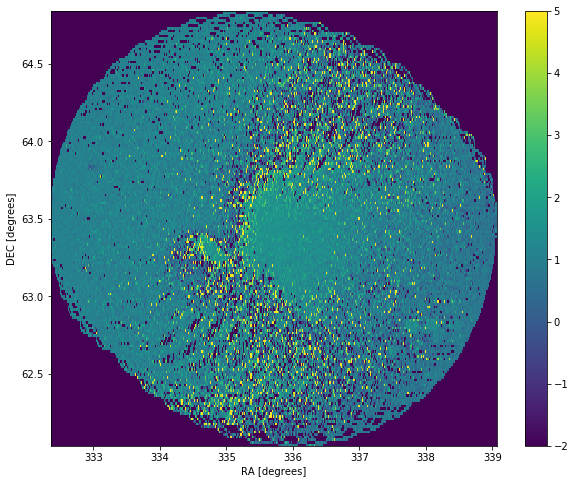

In [108]:
figure()
maskA = ~np.isnan(signalA)
maskB = ~np.isnan(signalB)
mask = maskA * maskB
ratioAB = signalA / signalB
ratioAB[~mask] = np.nan
pc = pcolormesh(rabins, decbins, ratioAB)
clim(-2, 5)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

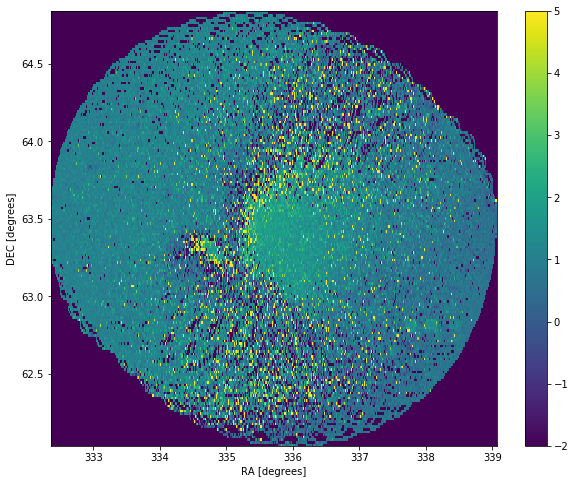

In [109]:
figure()
maskA = ~np.isnan(signalA)
maskC = ~np.isnan(signalC)
mask = maskA * maskC
ratioAC = signalA / signalC
ratioAC[~mask] = np.nan
pc = pcolormesh(rabins, decbins, ratioAC)
clim(-2, 5)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

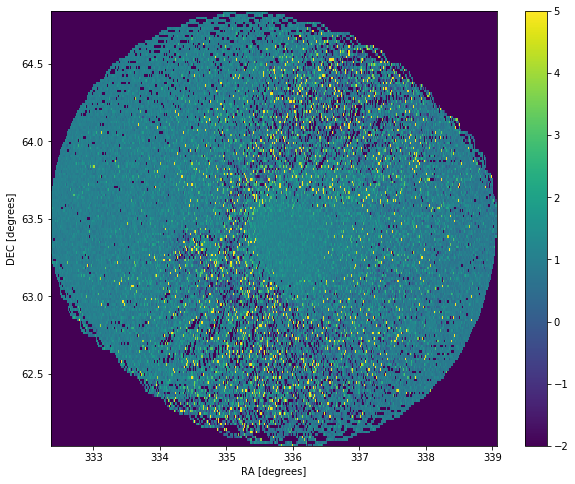

In [110]:
figure()
maskB = ~np.isnan(signalB)
maskC = ~np.isnan(signalC)
mask = maskB * maskC
ratioBC = signalB / signalC
ratioBC[~mask] = np.nan
pc = pcolormesh(rabins, decbins, ratioBC)
clim(-2, 5)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide


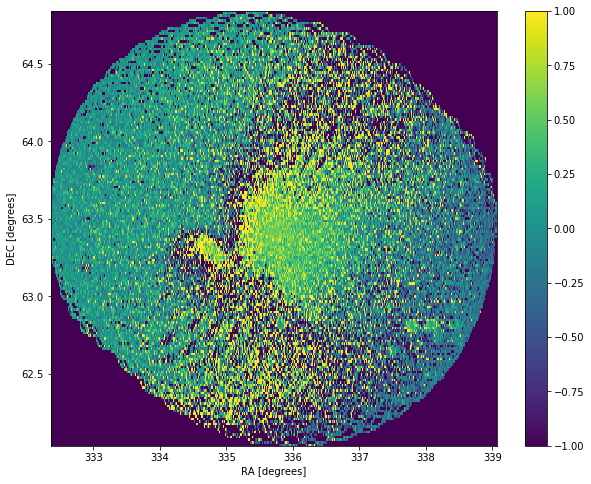

In [113]:
figure()
maskA = ~np.isnan(signalA)
maskB = ~np.isnan(signalB)
mask = maskA * maskB
perAB = (signalA - signalB) / signalB
perAB[~mask] = np.nan
pc = pcolormesh(rabins, decbins, perAB)
clim(-1, 1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

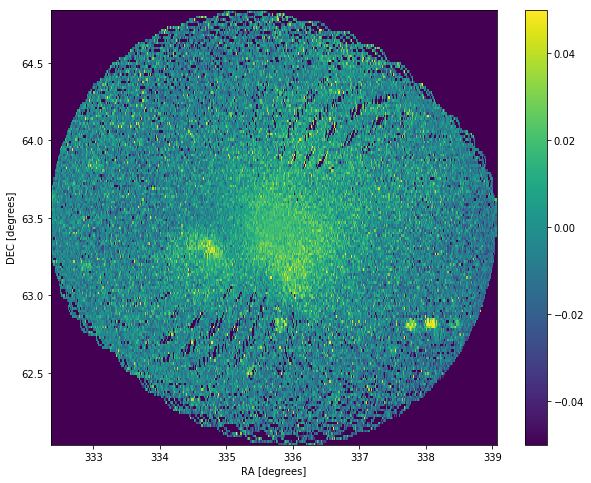

In [122]:
figure()
maskA = ~np.isnan(signalA)
maskB = ~np.isnan(signalB)
mask = maskA * maskB
diffAB = (signalA - signalB)
diffAB[~mask] = np.nan
pc = pcolormesh(rabins, decbins, diffAB)
clim(-.05, .05)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

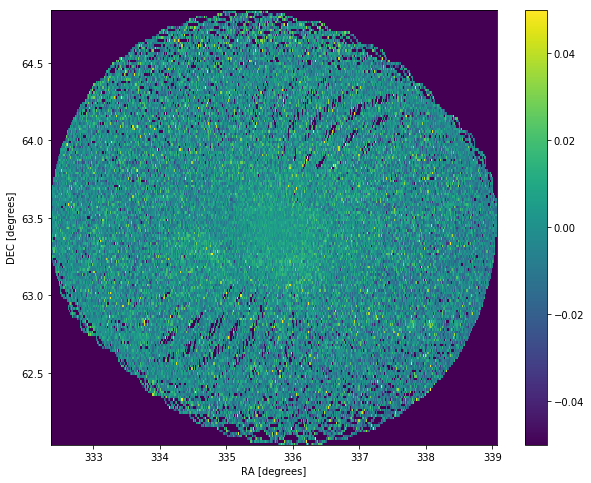

In [124]:
figure()
maskB = ~np.isnan(signalB)
maskC = ~np.isnan(signalC)
mask = maskB * maskC
diffBC = (signalB - signalC)
diffBC[~mask] = np.nan
pc = pcolormesh(rabins, decbins, diffBC)
clim(-.05, .05)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

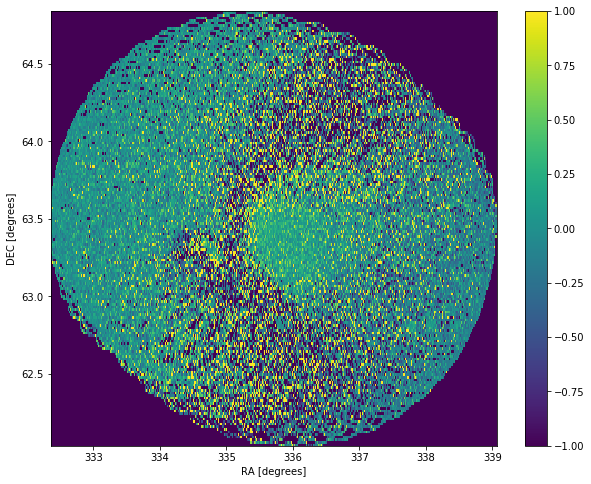

In [126]:
figure()
maskB = ~np.isnan(signalB)
maskC = ~np.isnan(signalC)
mask = maskB * maskC
perBC = (signalB - signalC) / signalC
perBC[~mask] = np.nan
pc = pcolormesh(rabins, decbins, perBC)
clim(-1, 1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


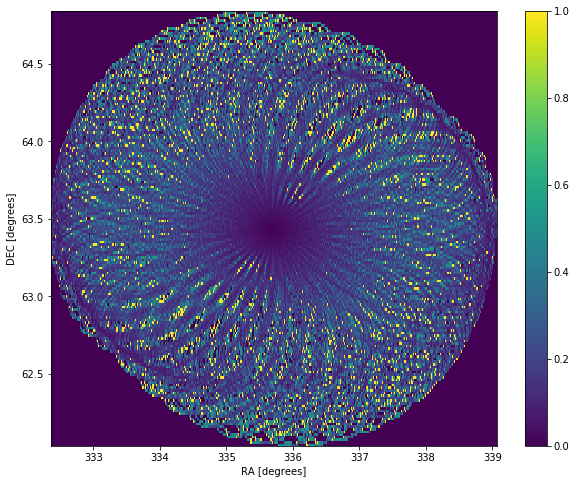

In [136]:
figure()
mask = hitsA == 0
invhits = 1. / hitsA
invhits[mask] = np.nan
pc = pcolormesh(rabins, decbins, invhits)
clim(0, 1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

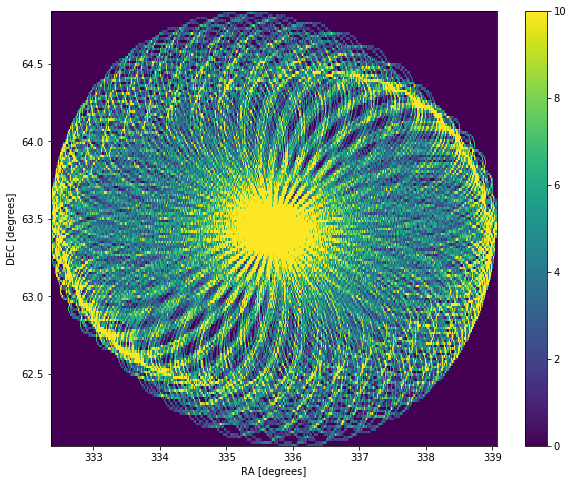

In [133]:
figure()
pc = pcolormesh(rabins, decbins, hitsA)
clim(0, 10)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')